# Segmentación

## Umbralización

OpenCV implementa varios algoritmos de umbralización que transforman la imagen original en una imagen binaria donde se asigna valor blanco o negro a un pixel según si su valor es superior o inferior a un valor determinado denominado umbral.

### Umbralización global
El algoritmo más sencillo es `threshold`, que aplica una umbralización utilizando un valor fijo como umbral. Esta función toma los siguientes parámetros:
- Imagen de entrada (sólo se aceptan en formato uint8 o float32)
- Umbral
- Valor máximo que tendrán los píxeles con valor mayor (o inferior) al umbral. Normalmente toma valor 255 si la imagen es uint8 o 1.0, en caso de una imagen en formato float.
- Tipo de umbralización. Se aceptan cinco posibles tipos de umbralización:
 - `cv2.THRESH_BINARY`
 - `cv2.THRESH_BINARY_INV`
 - `cv2.THRESH_TRUNC`
 - `cv2.THRESH_TOZERO`
 - `cv2.THRESH_TOZERO_INV`
 
 La opción `cv2.THRESH_BINARY` realiza la umbralización típica: los valores de la imagen superiores al umbral especificado tendrán el valor máximo en la imagen de salida.
 
Esta función devuelve dos valores de salida: el valor del umbral aplicado y la imagen de salida umbralizada.

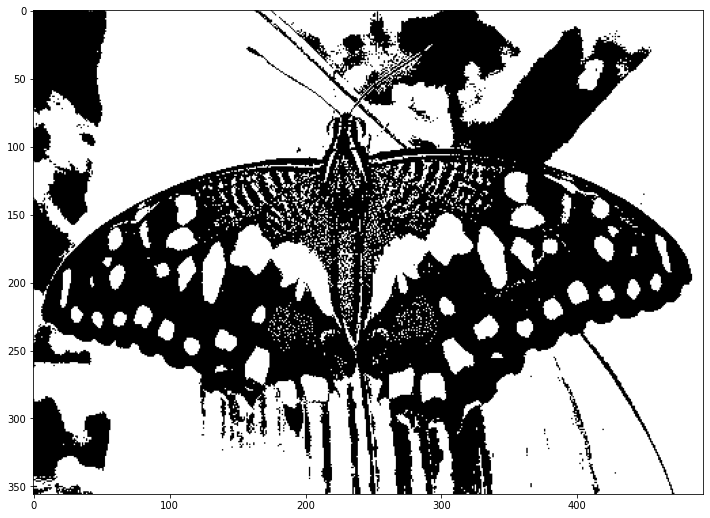

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import cv2
plt.rcParams["figure.figsize"] = [12,9]

im = cv2.imread("res/butterfly.jpg", cv2.IMREAD_GRAYSCALE)
thr, dst = cv2.threshold(im, 100, 255, cv2.THRESH_BINARY)

plt.imshow(dst,cmap='gray')
plt.show()

#### Ejercicio
Modifica el código anterior y prueba todos los tipos posibles de umbralización que ofrece OpenCV.

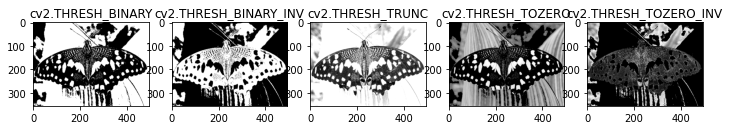

In [21]:
thr_methods = [cv2.THRESH_BINARY,cv2.THRESH_BINARY_INV,cv2.THRESH_TRUNC,cv2.THRESH_TOZERO,cv2.THRESH_TOZERO_INV]
thr_titles = ["cv2.THRESH_BINARY","cv2.THRESH_BINARY_INV","cv2.THRESH_TRUNC","cv2.THRESH_TOZERO","cv2.THRESH_TOZERO_INV"]
fig,ax = plt.subplots(1,5)
for i,m in enumerate(zip(thr_methods,thr_titles)):
    method,title = m
    thr, dst = cv2.threshold(im, 100, 255, method)
    ax[i].imshow(dst,cmap="gray")
    ax[i].set_title(title)
    
plt.show()

### Otsu

El algoritmo de umbralización de Otsu determina de forma automática el umbral ideal. En OpenCV, este umbral se calculará de forma automática si sumamos `cv2.THRESH_OTSU` al tipo de umbralización que hayamos seleccionado en la función `threshold`.

#### Ejercicio
Cuál es el umbral óptimo que establece Otsu en la imagen de la mariposa? Visualiza el resultado de la umbralización utilizando Otsu.
*Hint*: usa `cv2.THRESH_BINARY+cv2.THRESH_OTSU` como tipo de umbralización.

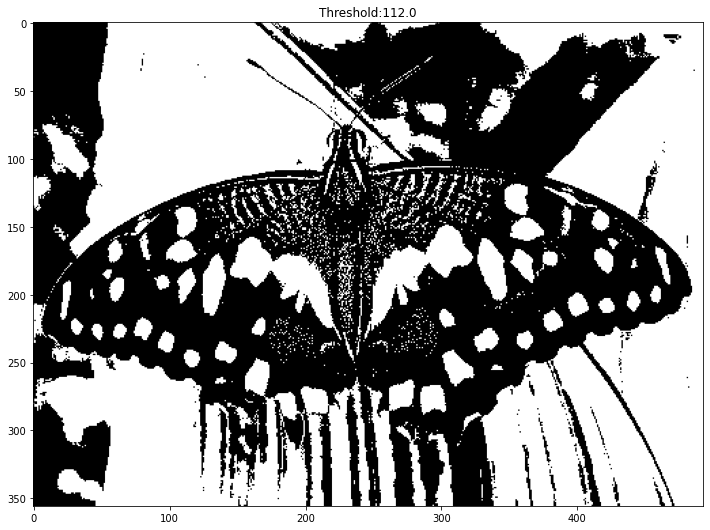

In [7]:
thr, dst_otsu = cv2.threshold(im, 100, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
fix,ax = plt.subplots(1,1)
ax.imshow(dst_otsu,cmap="gray")
ax.set_title("Threshold:%s"%thr)
plt.show()

### Umbralización adaptativa

En la umbralización adaptativa se utiliza un umbral local adaptado a cada región de la imagen. Así, este tipo de umbralización funciona muy bien con imágenes que presentan iluminación irregular.

La función `adaptiveThreshold` toma cuatro parámetros:
- Imagen de entrada
- Valor máximo a tomar por los píxeles que superen en umbral
- Método adaptativo: 
  - `cv2.ADAPTIVE_THRESH_MEAN_C`: el umbral se calcula como la media en el vecindario
  - `cv2.ADAPTIVE_THRESH_GAUSSIAN_C`: el umbral se calcula como la media ponderada por una gaussiana de los valores en el vecindario del pixel
- Tipo de umbralización (toma los mismos valores que en la función `threshold`)
- Tamaño del vecindario
- Constante que se suma o resta de la media calculada

La salida de la función es la imagen umbralizada.

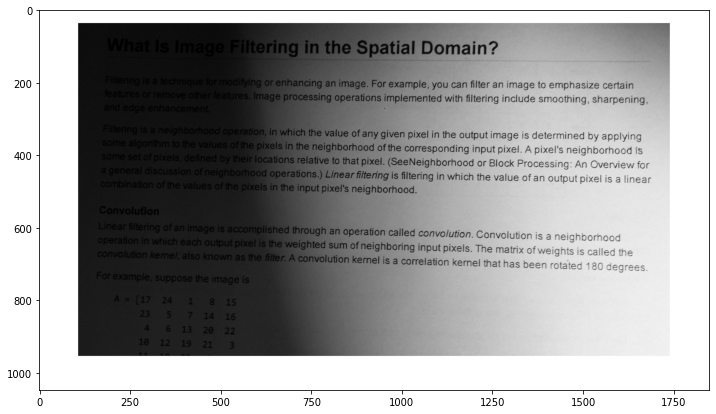

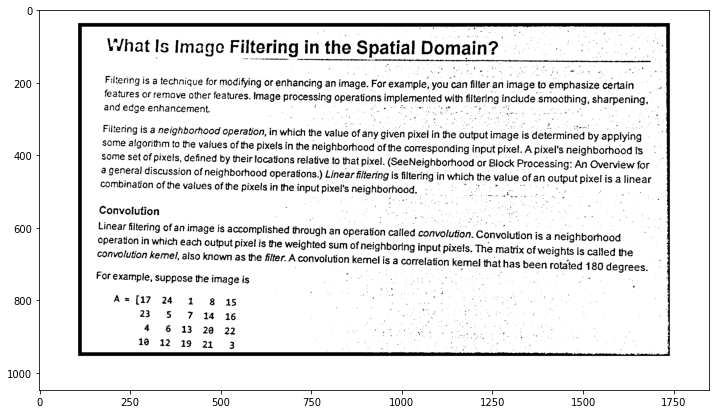

In [8]:
im = cv2.imread('res/text.png', cv2.IMREAD_GRAYSCALE)

adaptThr = cv2.adaptiveThreshold(im, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 21, 5)

plt.imshow(im, cmap='gray')
plt.show()

plt.imshow(adaptThr, cmap='gray')
plt.show()

#### Ejercicio

1) Modifica el código anterior y prueba el método gaussiano en la umbralización adaptativa. Prueba también a modificar el tamaño de vecindario y el valor de la constante. Qué influencia tienen estos parámetros en los resultados finales?

2) Aplica el método de umbralización global a la imagen `text.png`. Compara los resultados con los obtenidos con la umbralización adaptativa.

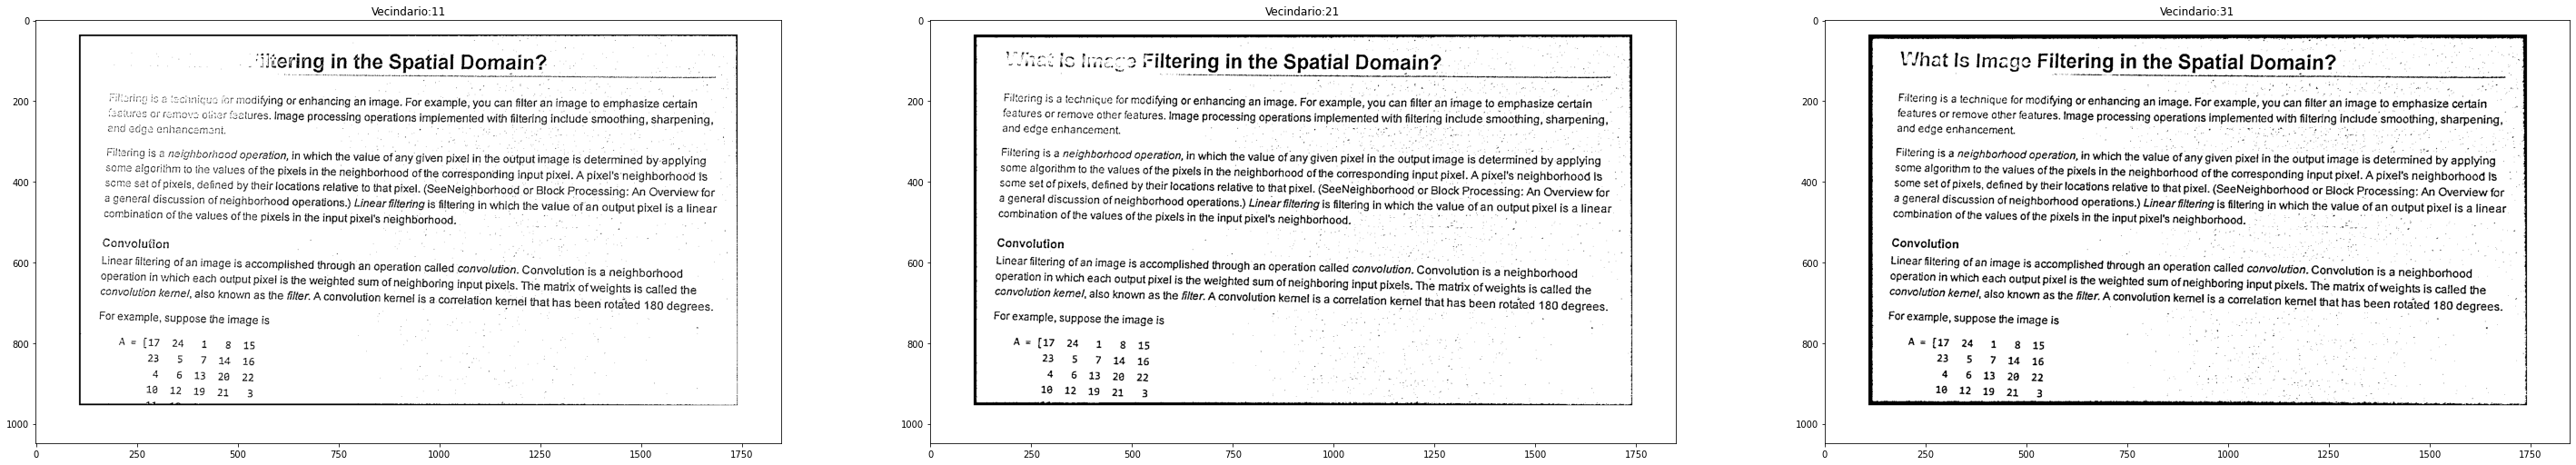

Text(0.5, 1.0, 'Umbralización global')

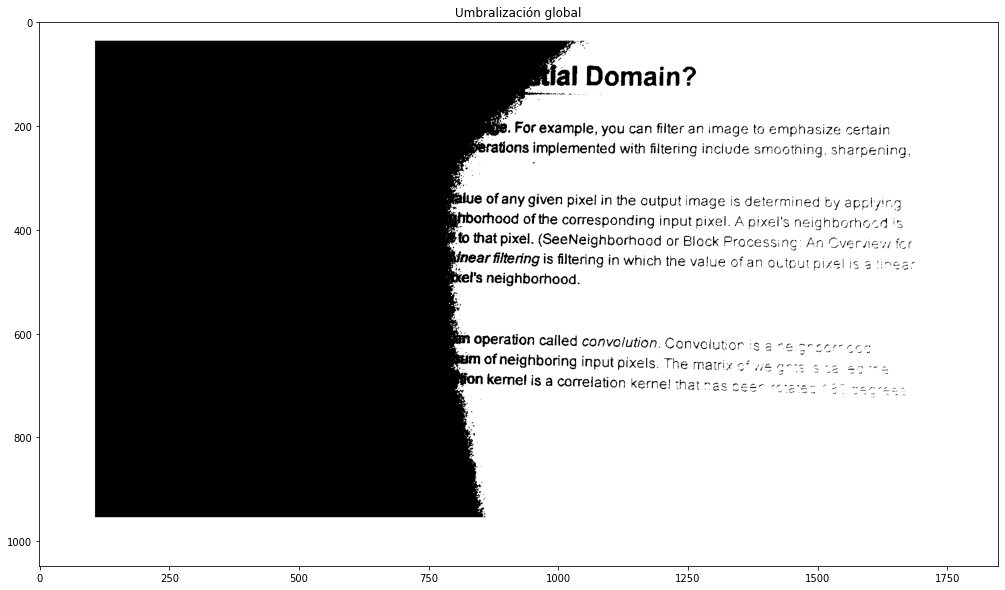

In [12]:
im = cv2.imread('res/text.png', cv2.IMREAD_GRAYSCALE)

fig,ax = plt.subplots(1,3)
plt.rcParams["figure.figsize"] = (50,10)
for i,n in enumerate([11,21,31]):
    adaptThr = cv2.adaptiveThreshold(im, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, n, 5)
    ax[i].imshow(adaptThr,cmap="gray")
    ax[i].set_title("Vecindario:%s"%n)

plt.show()
    

fig,ax = plt.subplots()
thr, dst = cv2.threshold(im, 100, 255, cv2.THRESH_BINARY)
ax.imshow(dst,cmap="gray")
ax.set_title("Umbralización global")

## Clustering
Uno de los criterios que se pueden utilizar para segmentar una imagen es dividir la imagen en regiones que compartan valores parecidos de color.

Podemos utilizar el algoritmo `k-means` para agrupar colores parecidos en la imagen y, de este modo, establecer una partición de la imagen en regiones.

La función `kmeans` está preparada para tomar como argumento un array de vectores a clusterizar. Cada vector puede estar formado por uno o más valores. 

Así, el primer paso es convertir la imagen de entrada a una lista de vectores. Si la imagen está en escala de grises, cada vector tendrá tamaño 1 y si la imagen está en color, cada vector estará compuesto por los valores R, G y B de la imagen. Este vector debe tener tipo float32.

In [13]:
im = cv2.imread("res/butterfly.jpg",cv2.IMREAD_COLOR)

Z = np.float32(im.reshape((-1,3)))

print(Z.shape)

(175508, 3)


El siguiente paso consiste en aplicar el algoritmo `kmeans`. Los parámetros obligatorios son:
- Lista de vectores a clusterizar
- Número K de clústers
- Tupla con los criterios de terminación: (tipo de terminación, número máximo de iteraciones, precisión). En este ejemplo el algoritmo dentendrá su ejecución si se alcanza la precisión o el número de iteraciones máximo.
- Número de veces que el algoritmo se puede ejecutar utilizando distintas inicializaciones. La salida del algoritmo será la ejecución con los mejores resultados.
- Modo en que se inicializan los centros de clúster. En el ejemplo, de forma aleatoria.

La salida de la función es triple: la suma de las distancias cuadráticas de cada punto a su centro de clúster correspondiente, las etiquetas de cada uno de los puntos del array y los centros de clúster.

In [14]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 8
dist,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

print(dist)
print(center)
print(label.shape, label[:10])


161561058.33359367
[[ 15.389609  17.138262  18.272808]
 [ 33.50896  148.73302   89.931786]
 [ 79.000694 192.50723  157.2578  ]
 [233.05539  243.81166  240.03445 ]
 [128.04185  142.07083  140.00905 ]
 [ 79.34418  107.68762   97.224045]
 [142.26921  206.18954  191.76299 ]
 [ 46.73161   72.02959   59.45076 ]]
(175508, 1) [[7]
 [7]
 [7]
 [7]
 [7]
 [7]
 [7]
 [7]
 [7]
 [7]]


El siguiente paso será convertir la salida a una imagen con el mismo tamaño que la imagen de entrada. Una forma de hacerlo sería la siguiente:

[[46 72 59]
 [46 72 59]
 [46 72 59]
 [46 72 59]
 [46 72 59]
 [46 72 59]
 [46 72 59]
 [46 72 59]
 [46 72 59]
 [46 72 59]]


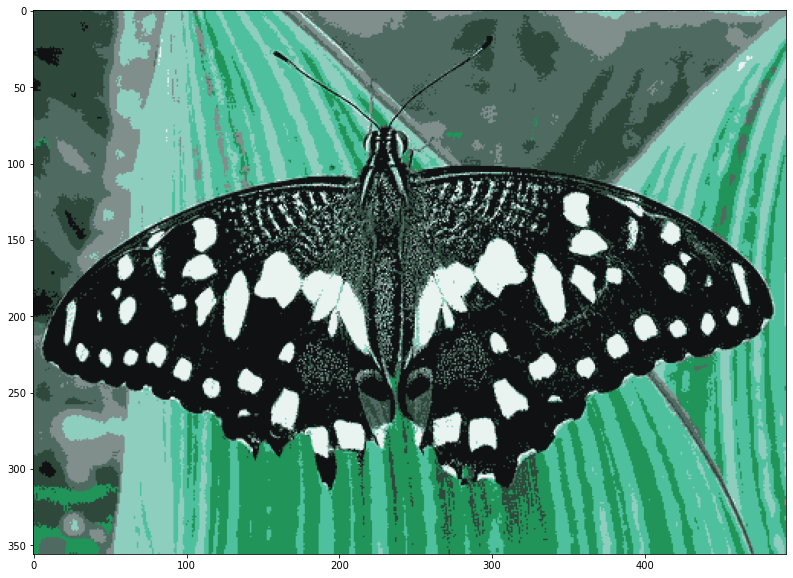

In [15]:
center = np.uint8(center) # Convertir los float a uint8
# A partir del array de etiquetas, generar un array en el cada posición es el centro de clúster
# correspondiente a dicha etiqueta
res = center[label.flatten()]
print(res[:10])

# Redimensionar el array plano a una imagen bidimensional
res2 = res.reshape((im.shape)) 

plt.imshow(res2, cmap='gray')
plt.show()

#### Ejercicio
1) Reescribir el ejemplo anterior leyendo la imagen en RGB y realizar el clústering con vectores de tres componentes.
*Hint*: sólo tienes que cambiar el modo de lectura de la imagen en `imread` y modificar los parámetros en `imreshape` para ajustar el número de componentes del vector de 1 a 3.


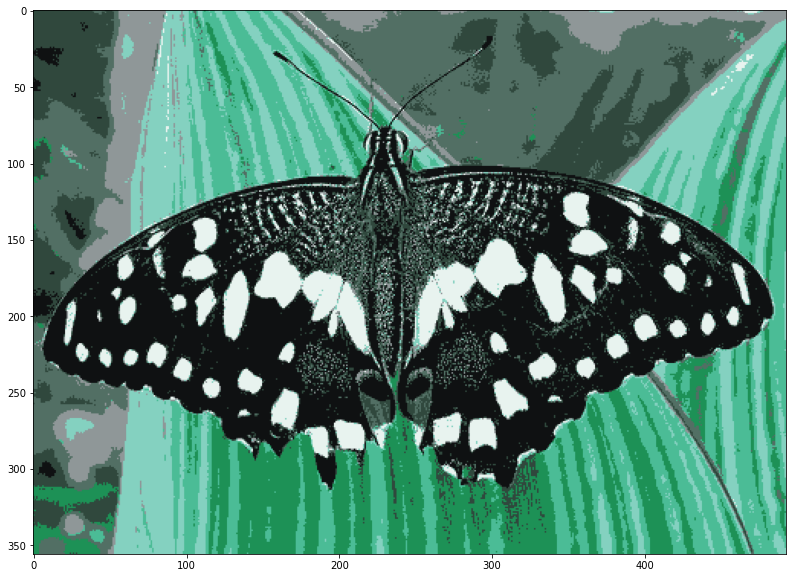

In [16]:
im = cv2.imread("res/butterfly.jpg",cv2.IMREAD_COLOR)



def dokmeans(img,K):
    Z = np.float32(img.reshape((-1,3)))
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    dist,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center) # Convertir los float a uint8
    # A partir del array de etiquetas, generar un array en el cada posición es el centro de clúster
    # correspondiente a dicha etiqueta
    res = center[label.flatten()]
    # Redimensionar el array plano a una imagen bidimensional
    return res.reshape((im.shape)) 

plt.imshow(dokmeans(im,8), cmap='gray')
plt.show()

2) Compara los resultados de clusterizar la imagen con K = 2, 4 y 16 colores.

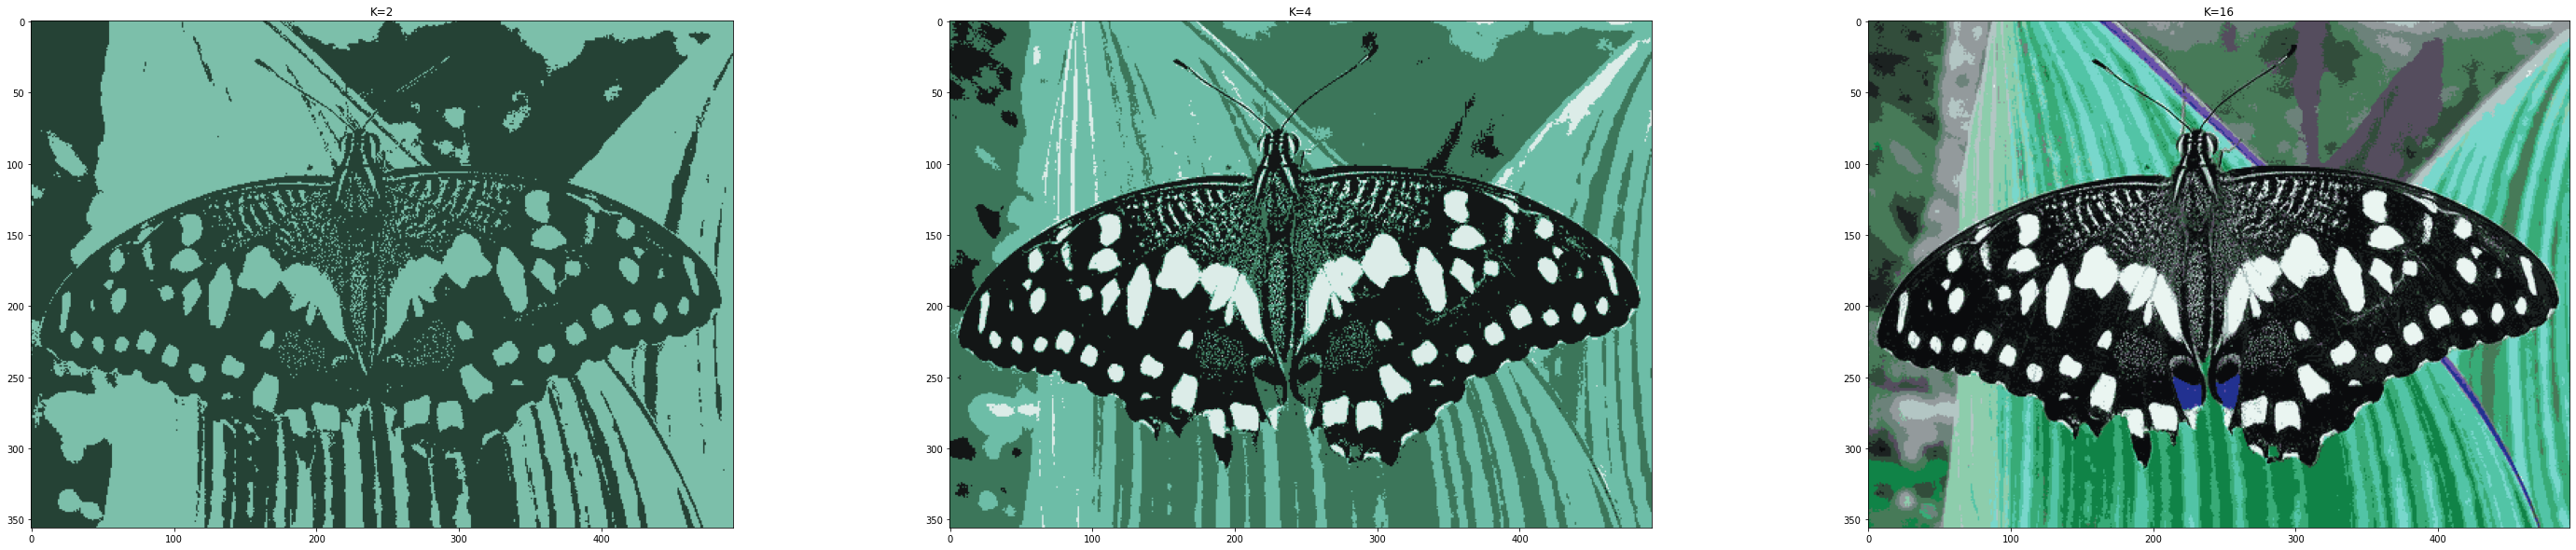

In [17]:
fig, ax = plt.subplots(1,3)
for i,k in enumerate([2,4,16]):
    ax[i].imshow(dokmeans(im,k),cmap="gray")
    ax[i].set_title("K=%s"%k)
plt.show()

## Segmentacion basada en regiones

OpenCV implementa varios algoritmos de segmentación basado en regiones. 

### Crecimiento de regiones
La función `floodFill` se utiliza para rellenar una región de la imagen uniforme con un determinado color a partir de un punto inicial denominado semilla. Esta función puede simular el comportamiento del algoritmo de crecimiento de regiones.

Los parámetros que se pasan a esta función son:
- Imagen original 
- Máscara donde se almacenará el resultado del algoritmo. Su tamaño debe ser igual al tamaño de la imagen con 2 filas y 2 columnas extra. 
- Coordenadas del pixel semilla
- Valor que tendrán los puntos de la región
- Máxima diferencia inferior entre el píxel observado y sus vecinos ya procesados para ser añadido a la región
- Máxima diferencia superior entre el píxel observado y sus vecinos ya procesados para ser añadido a la región


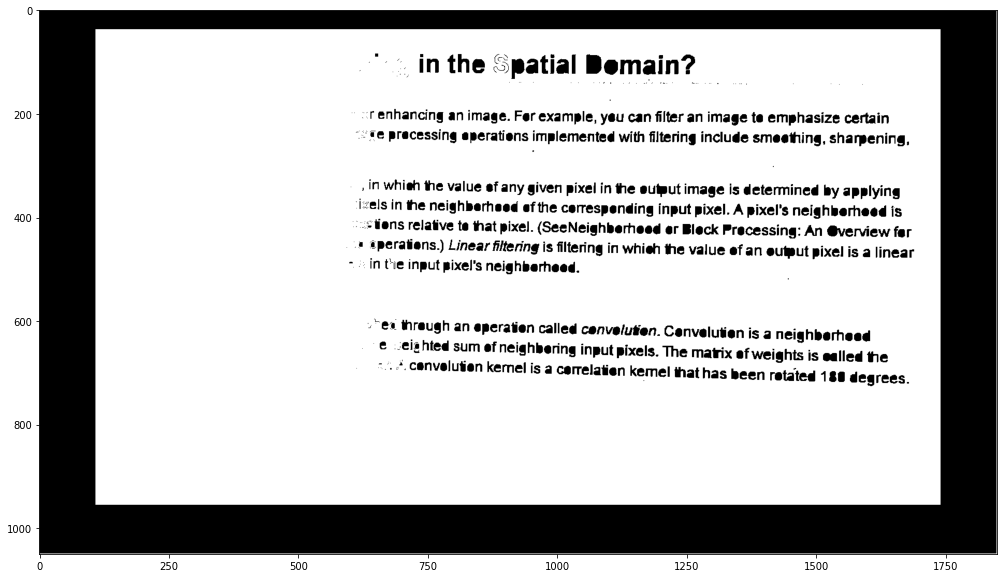

In [18]:
im = cv2.imread('res/text.png', cv2.IMREAD_GRAYSCALE)

mask = np.zeros((im.shape[0] +2, im.shape[1]+2), dtype=np.uint8)
cv2.floodFill(im, mask, (1500, 800), 255, 10, 10)

plt.imshow(mask, cmap='gray')
plt.show()

### Watershed

El algoritmo watershed parte de una serie de puntos semilla o marcadores. El algoritmo realiza un crecimiento de regiones a partir de estas semillas basado en el nivel de gris. Cuando las regiones generadas por dos marcadores se juntan se genera la línea watershed, la cual separa dos regiones consecutivas.

Este algoritmo se utiliza cuando los objetos a segmentar están próximos entre si o solapados, ya que es capaz de identificar los objetos de forma individual. Los resultados de este algoritmo dependen de una adecuada selección de marcadores inciales. 

En este ejemplo veremos una forma muy sencilla de utilizar el algoritmo watershed con marcadores.

El primer paso consiste en leer la imagen y transformala a escala de grises. Necesitaremos la imagen en color más tarde como entrada del propio algoritmo watershed. Como esta imagen es muy sencilla, utilizaremos una simple umbralización con el algoritmo de Otsu para separar fondo de primer plano.

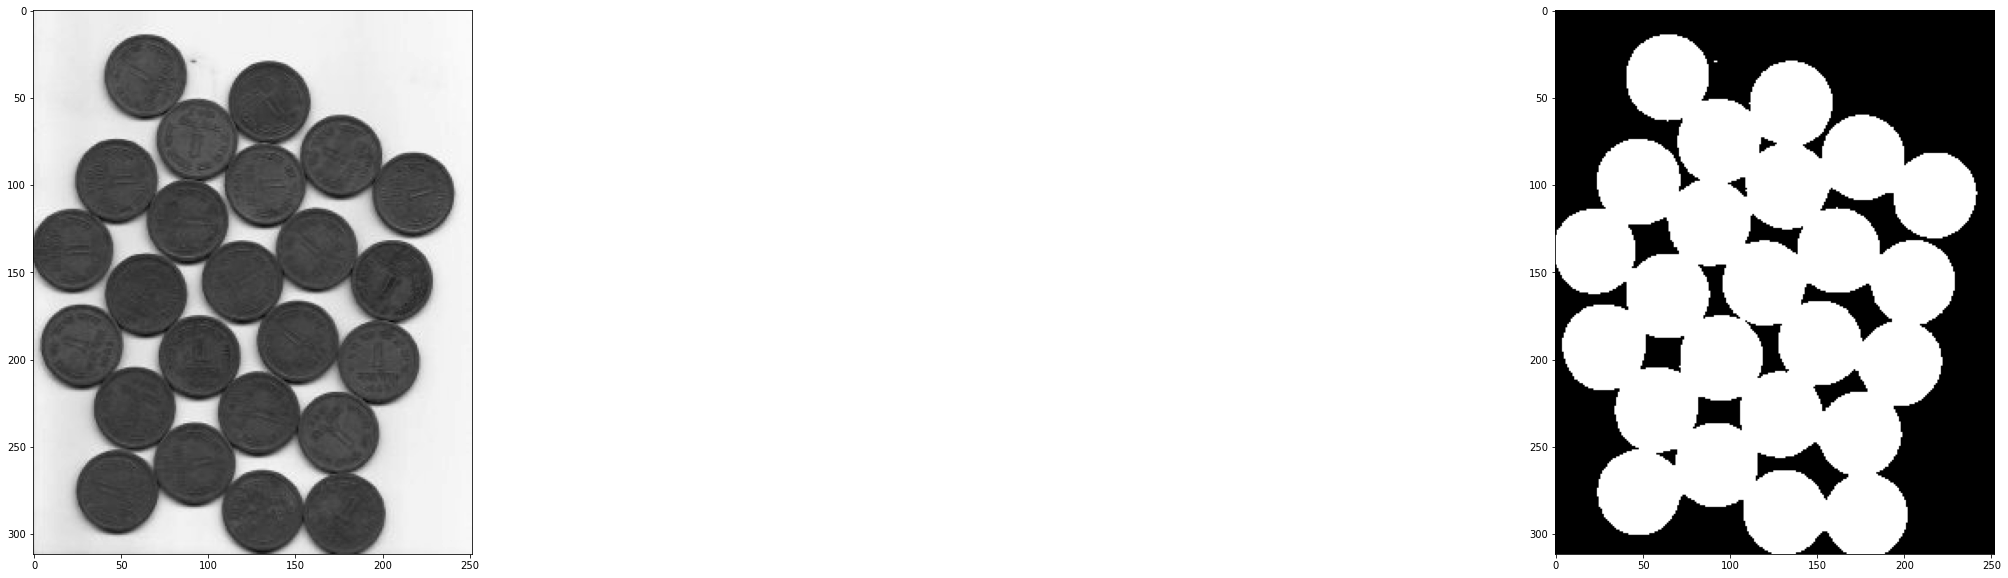

In [19]:
im = cv2.imread('res/coins2.jpg')
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)


ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

f, axarr = plt.subplots(1,2)
axarr[0].imshow(gray, cmap='gray')
axarr[1].imshow(thresh, cmap='gray')
plt.show()

Como nos interesa separar las monedas entre si, necesitamos establecer un marcador en cada una de las monedas. Como las monedas están unidas no es posible realizar esta operación directamente por lo que tenemos que idear una forma de encontrar el centro de cada moneda.

La función `distanceTransform` calcula la distancia de cada punto de la imagen al borde más cercano. Por tanto, si aplicamos esta función a la imagen umbralizada, los valores más altos estarán en el centro de las moneda. Si aplicamos una umbralización a los resultados de esta función, obtendremos un marcador en cada una de las monedas. En el ejemplo, estas posiciones centrales se almacenan en la variable `sure_fg` que representa las zonas de moneda separadas entre si.

Si restamos `sure_fg` a la imagen umbralizada `thresh` obtendremos los puntos alrededor del centro de cada moneda que debemos segmentar y asignar a cada una de las monedas.

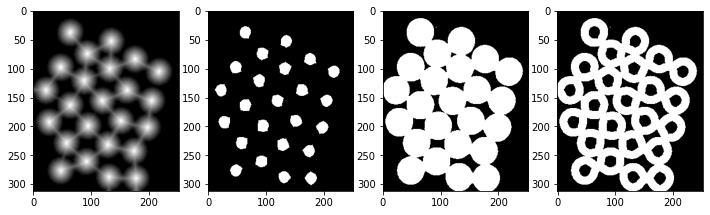

In [23]:
dist_transform = cv2.distanceTransform(thresh, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform,0.6*dist_transform.max(),255,cv2.THRESH_BINARY)
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(thresh, sure_fg)

f, axarr = plt.subplots(1,4)
axarr[0].imshow(dist_transform, cmap='gray')
axarr[1].imshow(sure_fg, cmap='gray')
axarr[2].imshow(thresh, cmap='gray')
axarr[3].imshow(unknown, cmap='gray')
plt.show()

Ahora debemos asignar un número entero distinto a cada una de las zonas centrales de las monedas que tenemos detectadas en `sure_fg`. Cada etiqueta representará una zona watershed. La función `connectedComponents` realiza precisamente esta operación y nos devuelve una matriz en el que cada región conectada está etiquetada con el mismo pixel. Los píxeles de la zona de fondo están etiquetados con ceros. 

El algoritmo watershed sólo analiza las regiones que aún no han sido etiquetadas, esto es, que su etiqueta es 0. En nuestro caso, estas regiones son las que se encuentran alrededor de los marcadores centrales (matriz `unknown`). Por ello, todos los píxeles excepto los que tienen un valor 255 en la matriz `unknown` deben tener un valor superior a 0.

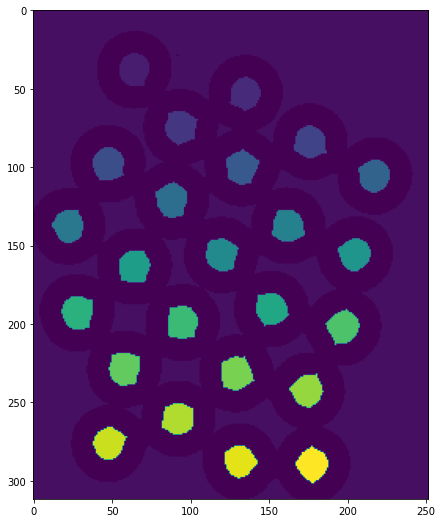

In [24]:
sure_fg = np.uint8(sure_fg)
ret, markers = cv2.connectedComponents(sure_fg) # Etiqueta cada region con un entero desde 0 a num_regiones
markers = markers + 1 # Ahora las etiquetas tienen valores de 1 a num_regiones
markers[unknown==255] = 0 # Solo las regiones alrededor del centro tienen valor 0: son las que procesará el algoritmo!
plt.imshow(markers)
plt.show()

Una vez que tenemos los marcadores y las regiones de análisis etiquetadas correctamente, el siguiente paso es aplicar el algoritmo watershed.

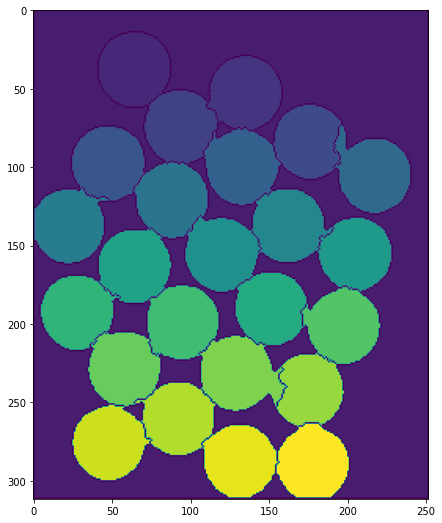

In [25]:
markers = cv2.watershed(im, markers)

plt.imshow(markers)
plt.show()